Sample encoded review (train):  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Associated label (0 = negati

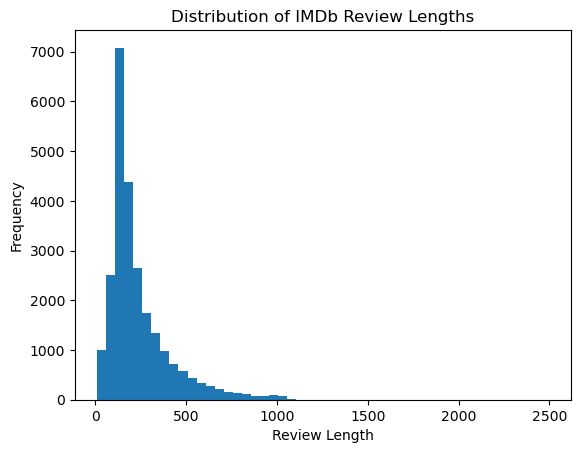

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the IMDb dataset
max_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

# Displaying an example of a review and its length
print("Sample encoded review (train): ", X_train[0])
print("Associated label (0 = negative, 1 = positive): ", y_train[0])
print("Length of the first review: ", len(X_train[0]))

# Displaying the lengths of the reviews
plt.hist([len(x) for x in X_train], bins=50)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of IMDb Review Lengths")
plt.show()

In [7]:
# Preprocessing the data (pad sequences to make them uniform in length)
max_len = 200  # Maximum sequence length
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

# Creating the LSTM model with tahn activation function
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))# Default activation function is tanh
model.add(Dense(1, activation='sigmoid'))# Working on a binary classification problem

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trainning the model
batch_size = 64
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Displaying training progress
for epoch in range(1, epochs+1):
    print(f"Epoch {epoch}/{epochs} - Loss: {history.history['loss'][epoch-1]:.4f}, Accuracy: {history.history['accuracy'][epoch-1]:.4f}")

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 151s 357ms/step - accuracy: 0.7099 - loss: 0.5447 - val_accuracy: 0.8114 - val_loss: 0.4142
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 356ms/step - accuracy: 0.8707 - loss: 0.3190 - val_accuracy: 0.8525 - val_loss: 0.3572
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 357ms/step - accuracy: 0.8901 - loss: 0.2771 - val_accuracy: 0.8462 - val_loss: 0.3768
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 358ms/step - accuracy: 0.9098 - loss: 0.2360 - val_accuracy: 0.8458 - val_loss: 0.3749
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 363ms/step - accuracy: 0.9283 - loss: 0.1942 - val_accuracy: 0.8048 - val_loss: 0.4848
Epoch 1/5 - Loss: 0.4648, Accuracy: 0.7803
Epoch 2/5 - Loss: 0.3329, Accuracy: 0.8632
Epoch 3/5 - Loss: 0.2812, Accuracy: 0.8870
Epoch 4/5 - Loss: 0.2359, Accuracy: 0.9102
Epoch 5/5 - Loss: 0.2030, Accuracy: 0.9245


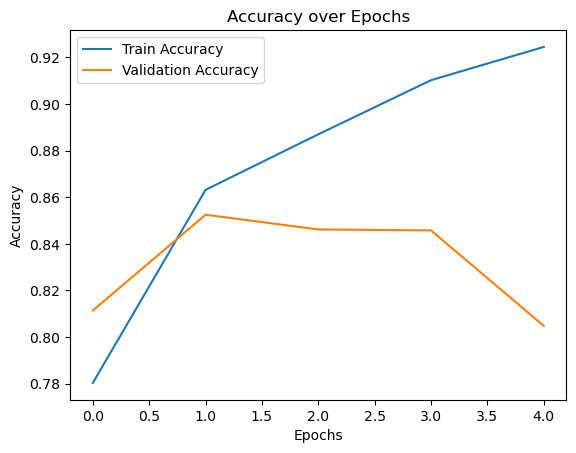

In [9]:
# Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#The validation accuracy can sometimes fluctuate

782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step


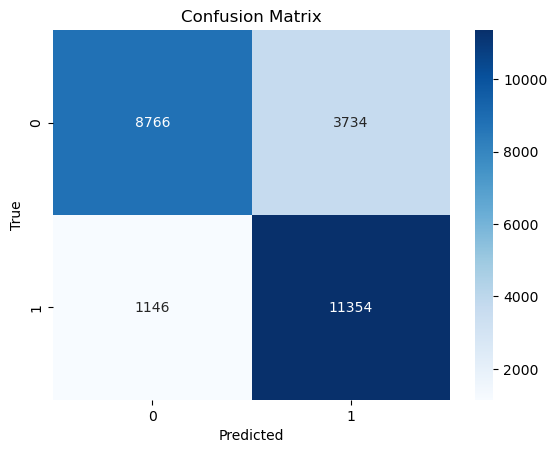

In [23]:
# Padding sequences for uniform length (ensure it's done)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_test = np.array(X_test)

# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8048
Precision: 0.7525
Recall: 0.9083
F1 Score: 0.8231


In [39]:
from keras.preprocessing.sequence import pad_sequences

# Preprocess the data
max_len = 100  # Maximum sequence length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Ensure your data is in the right format
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Creating the LSTM model with 4 hidden layers and relu activation function
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(units=64, activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(units=28, activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(units=14, activation='relu', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(LSTM(units=7, activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with another batch size
batch_size = 32
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Displaying training progress
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs} - Loss: {history.history['loss'][epoch - 1]:.4f}, Accuracy: {history.history['accuracy'][epoch - 1]:.4f}")

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 229ms/step - accuracy: 0.5763 - loss: 2.2914 - val_accuracy: 0.5241 - val_loss: 0.6826
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 193s 246ms/step - accuracy: 0.6163 - loss: 76.0284 - val_accuracy: 0.6896 - val_loss: 0.6782
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 204s 261ms/step - accuracy: 0.6204 - loss: 0.6588 - val_accuracy: 0.6825 - val_loss: 0.6168
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 205s 263ms/step - accuracy: 0.6661 - loss: 8.7707 - val_accuracy: 0.6846 - val_loss: 0.6681
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 207s 265ms/step - accuracy: 0.6070 - loss: 0.6492 - val_accuracy: 0.6603 - val_loss: 0.6221
Epoch 1/5 - Loss: 1.8121, Accuracy: 0.5909
Epoch 2/5 - Loss: 101.1850, Accuracy: 0.5968
Epoch 3/5 - Loss: 0.6461, Accuracy: 0.6452
Epoch 4/5 - Loss: 9.7234, Accuracy: 0.6150
Epoch 5/5 - Loss: 0.6384, Accuracy: 0.6309


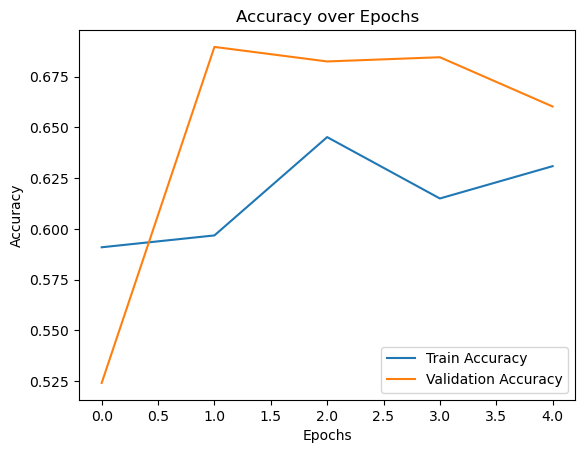

In [41]:
# Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step


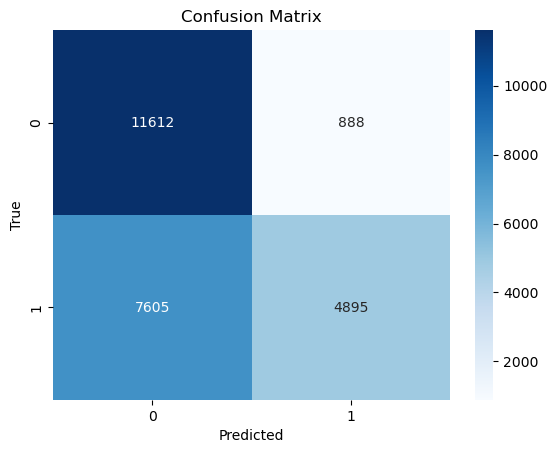

In [43]:
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_test = np.array(X_test)

# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [45]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6603
Precision: 0.8464
Recall: 0.3916
F1 Score: 0.5355


In [57]:
from keras.layers import GRU

# Preprocess the data
max_len = 100  # Maximum sequence length
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Ensure your data is in the right format
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Creating the GRU model with 4 hidden layers and relu activation function
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(GRU(units=64, activation='tanh', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(units=28, activation='tanh', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(units=14, activation='tanh', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(GRU(units=7, activation='tanh', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with another batch size
batch_size = 256
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Displaying training progress
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs} - Loss: {history.history['loss'][epoch - 1]:.4f}, Accuracy: {history.history['accuracy'][epoch - 1]:.4f}")

Epoch 1/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 121s 984ms/step - accuracy: 0.5955 - loss: 210.7534 - val_accuracy: 0.6973 - val_loss: 0.6546
Epoch 2/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 92s 942ms/step - accuracy: 0.7304 - loss: 0.6225 - val_accuracy: 0.7139 - val_loss: 0.6390
Epoch 3/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 92s 945ms/step - accuracy: 0.7565 - loss: 1.1748 - val_accuracy: 0.7176 - val_loss: 0.6287
Epoch 4/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 96s 977ms/step - accuracy: 0.7720 - loss: 0.5768 - val_accuracy: 0.7197 - val_loss: 0.6205
Epoch 5/5
98/98 ━━━━━━━━━━━━━━━━━━━━ 93s 951ms/step - accuracy: 0.7801 - loss: 0.5648 - val_accuracy: 0.7222 - val_loss: 0.6143
Epoch 1/5 - Loss: 225.3873, Accuracy: 0.6446
Epoch 2/5 - Loss: 0.6165, Accuracy: 0.7352
Epoch 3/5 - Loss: 0.9416, Accuracy: 0.7581
Epoch 4/5 - Loss: 0.5756, Accuracy: 0.7700
Epoch 5/5 - Loss: 0.5646, Accuracy: 0.7788


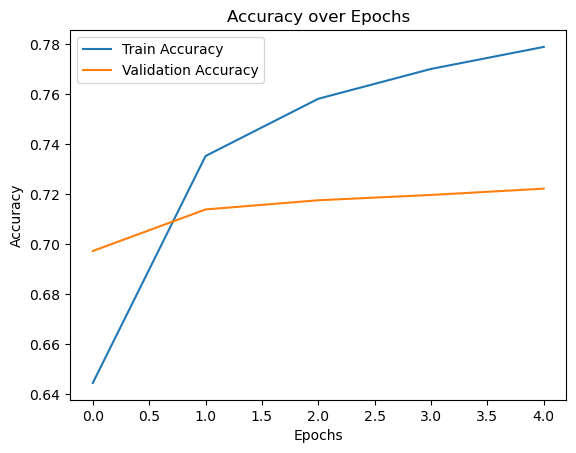

In [59]:
# Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step


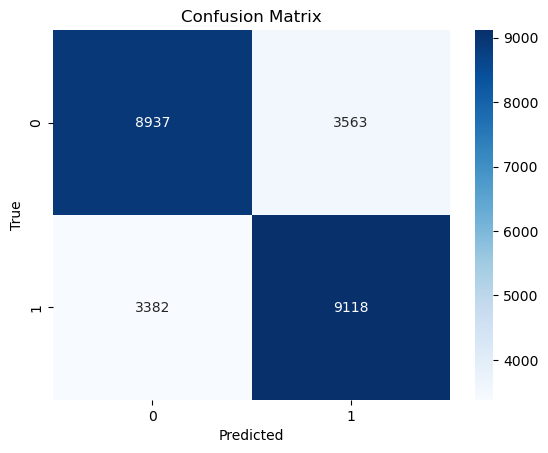

In [61]:
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_test = np.array(X_test)

# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [63]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.7222
Precision: 0.7190
Recall: 0.7294
F1 Score: 0.7242


In [67]:
# Preprocessing the data (pad sequences to make them uniform in length)
max_len = 200  # Maximum sequence length
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)

# Creating the GRU model with default activation function (tanh)
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(GRU(units=64, dropout=0.2, recurrent_dropout=0.2))  # Default activation function is tanh
model.add(Dense(1, activation='sigmoid'))  # Working on a binary classification problem

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model with another batch size
batch_size = 400
epochs = 5
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Displaying training progress
for epoch in range(1, epochs + 1):
    print(f"Epoch {epoch}/{epochs} - Loss: {history.history['loss'][epoch - 1]:.4f}, Accuracy: {history.history['accuracy'][epoch - 1]:.4f}")

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.6057 - loss: 53742.4961 - val_accuracy: 0.6752 - val_loss: 0.6065
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7208 - loss: 331097.2812 - val_accuracy: 0.6858 - val_loss: 0.5917
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 161s 3s/step - accuracy: 0.7666 - loss: 0.5351 - val_accuracy: 0.6908 - val_loss: 0.5779
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.7818 - loss: 0.4998 - val_accuracy: 0.6943 - val_loss: 0.5700
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.7948 - loss: 0.4768 - val_accuracy: 0.6973 - val_loss: 0.5662
Epoch 1/5 - Loss: 115313.5859, Accuracy: 0.6643
Epoch 2/5 - Loss: 727795.1250, Accuracy: 0.7334
Epoch 3/5 - Loss: 0.5297, Accuracy: 0.7645
Epoch 4/5 - Loss: 0.4993, Accuracy: 0.7800
Epoch 5/5 - Loss: 0.4728, Accuracy: 0.7934


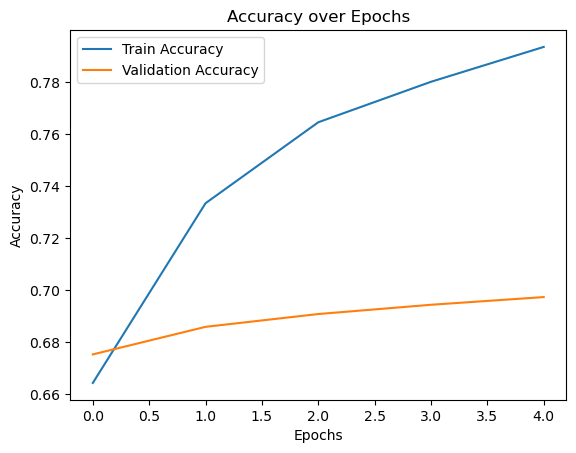

In [69]:
# Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 57ms/step


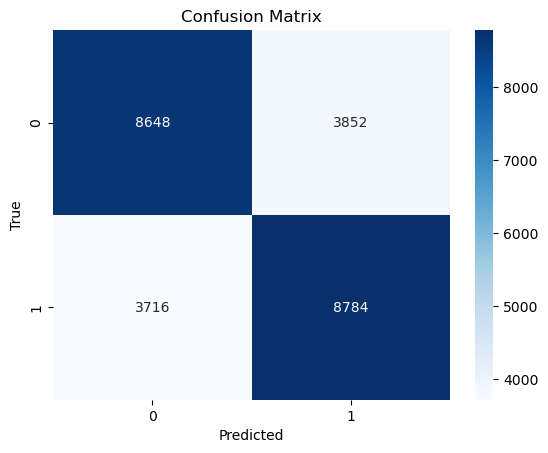

In [71]:
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
X_test = np.array(X_test)

# Predicting on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [73]:
# Calculating metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.6973
Precision: 0.6952
Recall: 0.7027
F1 Score: 0.6989
